# Convolutional NN

In [1]:
import os
os.chdir('C:\\Users\\MJ Couto\\Desktop\\sib_git\\si\\src')

In [2]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from si.data import Dataset
from si.util.util import to_categorical

Load the MNIST dataset

In [3]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [4]:
train,test = load_mnist(500)

In [5]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [6]:
preprocess(train)
preprocess(test)

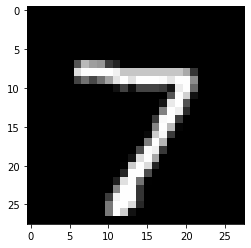

In [7]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [8]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from si.util.activation import Tanh, Sigmoid 
from si.util.metrics import cross_entropy, cross_entropy_prime

### Check Conv2D

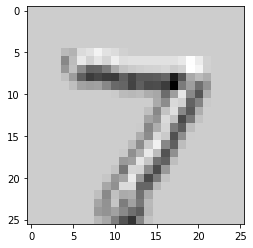

In [9]:
conv = Conv2D((28, 28,1), (3, 3), 1)
out = conv.forward(test.X[:1])
plot_img(out, shape=(26, 26))


### Check MaxPooling

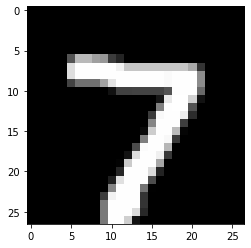

In [10]:
pool = MaxPooling2D(size=2,stride=1)
out = pool.forward(test.X[:1])
plot_img(out, shape=(27, 27))


## Build the model

In [11]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(MaxPooling2D())
net.add(Flatten())
net.add(Dense(25*25*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

net.useLoss(cross_entropy, cross_entropy_prime)

## Train the model

In [12]:
net.fit(train)

 epoch 1/2000 error = 560.6673206567225
 epoch 2/2000 error = 3667.3715349441977
 epoch 3/2000 error = 31333.470158860942
 epoch 4/2000 error = 40380.54917606898
 epoch 5/2000 error = 40232.28444771655
 epoch 6/2000 error = 40232.26184351387
 epoch 7/2000 error = 40232.23962407628
 epoch 8/2000 error = 40232.21826196095
 epoch 9/2000 error = 40232.19934702125
 epoch 10/2000 error = 40232.19178603419
 epoch 11/2000 error = 40232.39827922842
 epoch 12/2000 error = 41099.59675662212
 epoch 13/2000 error = 41099.57189977033
 epoch 14/2000 error = 41099.54703473966
 epoch 15/2000 error = 41099.522161523775
 epoch 16/2000 error = 41099.49728011637
 epoch 17/2000 error = 41099.4723905111
 epoch 18/2000 error = 41099.44749270166
 epoch 19/2000 error = 41099.422586681685
 epoch 20/2000 error = 41099.39767244483
 epoch 21/2000 error = 41099.37274998474
 epoch 22/2000 error = 41099.34781929504
 epoch 23/2000 error = 41099.322880369364
 epoch 24/2000 error = 41099.29793320134
 epoch 25/2000 error 

 epoch 198/2000 error = 41094.82562267672
 epoch 199/2000 error = 41094.799127498656
 epoch 200/2000 error = 41094.77262282626
 epoch 201/2000 error = 41094.7461086516
 epoch 202/2000 error = 41094.71958496674
 epoch 203/2000 error = 41094.693051763745
 epoch 204/2000 error = 41094.66650903467
 epoch 205/2000 error = 41094.639956771534
 epoch 206/2000 error = 41094.61339496639
 epoch 207/2000 error = 41094.58682361123
 epoch 208/2000 error = 41094.56024269806
 epoch 209/2000 error = 41094.53365221892
 epoch 210/2000 error = 41094.50705216574
 epoch 211/2000 error = 41094.480442530534
 epoch 212/2000 error = 41094.45382330526
 epoch 213/2000 error = 41094.42719448187
 epoch 214/2000 error = 41094.4005560523
 epoch 215/2000 error = 41094.37390800851
 epoch 216/2000 error = 41094.34725034241
 epoch 217/2000 error = 41094.320583045934
 epoch 218/2000 error = 41094.29390611095
 epoch 219/2000 error = 41094.26721952938
 epoch 220/2000 error = 41094.24052329309
 epoch 221/2000 error = 41094.2

 epoch 393/2000 error = 41089.46920939977
 epoch 394/2000 error = 41089.440699660394
 epoch 395/2000 error = 41089.41217866858
 epoch 396/2000 error = 41089.38364641406
 epoch 397/2000 error = 41089.355102886584
 epoch 398/2000 error = 41089.32654807586
 epoch 399/2000 error = 41089.29798197158
 epoch 400/2000 error = 41089.26940456344
 epoch 401/2000 error = 41089.24081584112
 epoch 402/2000 error = 41089.21221579426
 epoch 403/2000 error = 41089.18360441252
 epoch 404/2000 error = 41089.15498168553
 epoch 405/2000 error = 41089.1263476029
 epoch 406/2000 error = 41089.09770215422
 epoch 407/2000 error = 41089.06904532909
 epoch 408/2000 error = 41089.0403771171
 epoch 409/2000 error = 41089.01169750776
 epoch 410/2000 error = 41088.983006490664
 epoch 411/2000 error = 41088.9543040553
 epoch 412/2000 error = 41088.92559019121
 epoch 413/2000 error = 41088.89686488788
 epoch 414/2000 error = 41088.86812813478
 epoch 415/2000 error = 41088.83937992142
 epoch 416/2000 error = 41088.8106

 epoch 588/2000 error = 41083.68359786669
 epoch 589/2000 error = 41083.65268095376
 epoch 590/2000 error = 41083.62175048403
 epoch 591/2000 error = 41083.59080644391
 epoch 592/2000 error = 41083.559848819765
 epoch 593/2000 error = 41083.52887759794
 epoch 594/2000 error = 41083.49789276479
 epoch 595/2000 error = 41083.4668943066
 epoch 596/2000 error = 41083.43588220967
 epoch 597/2000 error = 41083.404856460285
 epoch 598/2000 error = 41083.37381704466
 epoch 599/2000 error = 41083.34276394904
 epoch 600/2000 error = 41083.31169715964
 epoch 601/2000 error = 41083.280616662625
 epoch 602/2000 error = 41083.24952244417
 epoch 603/2000 error = 41083.21841449043
 epoch 604/2000 error = 41083.187292787516
 epoch 605/2000 error = 41083.1561573215
 epoch 606/2000 error = 41083.12500807851
 epoch 607/2000 error = 41083.09384504457
 epoch 608/2000 error = 41083.062668205734
 epoch 609/2000 error = 41083.03147754799
 epoch 610/2000 error = 41083.00027305736
 epoch 611/2000 error = 41082.9

 epoch 783/2000 error = 41077.38050471778
 epoch 784/2000 error = 41077.34665895116
 epoch 785/2000 error = 41077.31279652461
 epoch 786/2000 error = 41077.27891741952
 epoch 787/2000 error = 41077.245021617295
 epoch 788/2000 error = 41077.21110909926
 epoch 789/2000 error = 41077.17717984674
 epoch 790/2000 error = 41077.14323384102
 epoch 791/2000 error = 41077.10927106334
 epoch 792/2000 error = 41077.07529149492
 epoch 793/2000 error = 41077.04129511694
 epoch 794/2000 error = 41077.00728191056
 epoch 795/2000 error = 41076.97325185692
 epoch 796/2000 error = 41076.939204937094
 epoch 797/2000 error = 41076.905141132134
 epoch 798/2000 error = 41076.87106042309
 epoch 799/2000 error = 41076.83696279092
 epoch 800/2000 error = 41076.80284821661
 epoch 801/2000 error = 41076.76871668109
 epoch 802/2000 error = 41076.73456816525
 epoch 803/2000 error = 41076.700402649956
 epoch 804/2000 error = 41076.66622011604
 epoch 805/2000 error = 41076.632020544304
 epoch 806/2000 error = 41076

 epoch 977/2000 error = 41070.47829312083
 epoch 978/2000 error = 41070.44082508757
 epoch 979/2000 error = 41070.403336101444
 epoch 980/2000 error = 41070.36582613613
 epoch 981/2000 error = 41070.32829516528
 epoch 982/2000 error = 41070.2907431625
 epoch 983/2000 error = 41070.25317010135
 epoch 984/2000 error = 41070.21557595532
 epoch 985/2000 error = 41070.17796069788
 epoch 986/2000 error = 41070.14032430241
 epoch 987/2000 error = 41070.102666742285
 epoch 988/2000 error = 41070.06498799077
 epoch 989/2000 error = 41070.02728802114
 epoch 990/2000 error = 41069.98956680659
 epoch 991/2000 error = 41069.95182432026
 epoch 992/2000 error = 41069.91406053525
 epoch 993/2000 error = 41069.8762754246
 epoch 994/2000 error = 41069.838468961316
 epoch 995/2000 error = 41069.80064111831
 epoch 996/2000 error = 41069.7627918685
 epoch 997/2000 error = 41069.724921184694
 epoch 998/2000 error = 41069.68702903972
 epoch 999/2000 error = 41069.64911540626
 epoch 1000/2000 error = 41069.61

 epoch 1168/2000 error = 41062.90868463045
 epoch 1169/2000 error = 41062.86667268915
 epoch 1170/2000 error = 41062.82463369731
 epoch 1171/2000 error = 41062.78256761622
 epoch 1172/2000 error = 41062.74047440713
 epoch 1173/2000 error = 41062.69835403121
 epoch 1174/2000 error = 41062.65620644951
 epoch 1175/2000 error = 41062.61403162302
 epoch 1176/2000 error = 41062.57182951268
 epoch 1177/2000 error = 41062.52960007926
 epoch 1178/2000 error = 41062.487343283516
 epoch 1179/2000 error = 41062.44505908612
 epoch 1180/2000 error = 41062.40274744761
 epoch 1181/2000 error = 41062.360408328466
 epoch 1182/2000 error = 41062.31804168908
 epoch 1183/2000 error = 41062.275647489776
 epoch 1184/2000 error = 41062.233225690754
 epoch 1185/2000 error = 41062.19077625216
 epoch 1186/2000 error = 41062.14829913403
 epoch 1187/2000 error = 41062.10579429633
 epoch 1188/2000 error = 41062.06326169893
 epoch 1189/2000 error = 41062.02070130162
 epoch 1190/2000 error = 41061.97811306408
 epoch 

 epoch 1358/2000 error = 41054.39228488828
 epoch 1359/2000 error = 41054.34433037981
 epoch 1360/2000 error = 41054.29633964863
 epoch 1361/2000 error = 41054.24831263468
 epoch 1362/2000 error = 41054.20024927774
 epoch 1363/2000 error = 41054.152149517424
 epoch 1364/2000 error = 41054.10401329322
 epoch 1365/2000 error = 41054.055840544446
 epoch 1366/2000 error = 41054.007631210276
 epoch 1367/2000 error = 41053.959385229726
 epoch 1368/2000 error = 41053.911102541664
 epoch 1369/2000 error = 41053.862783084805
 epoch 1370/2000 error = 41053.8144267977
 epoch 1371/2000 error = 41053.766033618755
 epoch 1372/2000 error = 41053.71760348621
 epoch 1373/2000 error = 41053.66913633817
 epoch 1374/2000 error = 41053.620632112565
 epoch 1375/2000 error = 41053.57209074716
 epoch 1376/2000 error = 41053.5235121796
 epoch 1377/2000 error = 41053.47489634735
 epoch 1378/2000 error = 41053.42624318767
 epoch 1379/2000 error = 41053.37755263775
 epoch 1380/2000 error = 41053.32882463456
 epoc

 epoch 1548/2000 error = 41044.55392947713
 epoch 1549/2000 error = 41044.49781382501
 epoch 1550/2000 error = 41044.44164714015
 epoch 1551/2000 error = 41044.38542932186
 epoch 1552/2000 error = 41044.329160269204
 epoch 1553/2000 error = 41044.27283988088
 epoch 1554/2000 error = 41044.21646805532
 epoch 1555/2000 error = 41044.16004469067
 epoch 1556/2000 error = 41044.10356968471
 epoch 1557/2000 error = 41044.04704293499
 epoch 1558/2000 error = 41043.9904643387
 epoch 1559/2000 error = 41043.93383379275
 epoch 1560/2000 error = 41043.87715119372
 epoch 1561/2000 error = 41043.820416437906
 epoch 1562/2000 error = 41043.763629421286
 epoch 1563/2000 error = 41043.70679003948
 epoch 1564/2000 error = 41043.64989818789
 epoch 1565/2000 error = 41043.59295376149
 epoch 1566/2000 error = 41043.535956655025
 epoch 1567/2000 error = 41043.47890676288
 epoch 1568/2000 error = 41043.421803979145
 epoch 1569/2000 error = 41043.36464819756
 epoch 1570/2000 error = 41043.30743931157
 epoch 

 epoch 1738/2000 error = 41032.84391054976
 epoch 1739/2000 error = 41032.775878019675
 epoch 1740/2000 error = 41032.707768226566
 epoch 1741/2000 error = 41032.63958098254
 epoch 1742/2000 error = 41032.57131609899
 epoch 1743/2000 error = 41032.50297338664
 epoch 1744/2000 error = 41032.434552655526
 epoch 1745/2000 error = 41032.36605371494
 epoch 1746/2000 error = 41032.29747637352
 epoch 1747/2000 error = 41032.22882043918
 epoch 1748/2000 error = 41032.16008571914
 epoch 1749/2000 error = 41032.0912720199
 epoch 1750/2000 error = 41032.02237914722
 epoch 1751/2000 error = 41031.95340690618
 epoch 1752/2000 error = 41031.88435510111
 epoch 1753/2000 error = 41031.81522353564
 epoch 1754/2000 error = 41031.746012012634
 epoch 1755/2000 error = 41031.67672033429
 epoch 1756/2000 error = 41031.60734830196
 epoch 1757/2000 error = 41031.53789571638
 epoch 1758/2000 error = 41031.46836237744
 epoch 1759/2000 error = 41031.39874808435
 epoch 1760/2000 error = 41031.32905263551
 epoch 1

 epoch 1928/2000 error = 41018.2747563602
 epoch 1929/2000 error = 41018.187667497594
 epoch 1930/2000 error = 41018.10044806018
 epoch 1931/2000 error = 41018.01309763441
 epoch 1932/2000 error = 41017.925615804736
 epoch 1933/2000 error = 41017.83800215364
 epoch 1934/2000 error = 41017.750256261636
 epoch 1935/2000 error = 41017.66237770718
 epoch 1936/2000 error = 41017.57436606675
 epoch 1937/2000 error = 41017.48622091476
 epoch 1938/2000 error = 41017.39794182359
 epoch 1939/2000 error = 41017.30952836358
 epoch 1940/2000 error = 41017.22098010293
 epoch 1941/2000 error = 41017.13229660785
 epoch 1942/2000 error = 41017.04347744238
 epoch 1943/2000 error = 41016.95452216845
 epoch 1944/2000 error = 41016.865430345904
 epoch 1945/2000 error = 41016.77620153241
 epoch 1946/2000 error = 41016.6868352835
 epoch 1947/2000 error = 41016.59733115251
 epoch 1948/2000 error = 41016.507688690624
 epoch 1949/2000 error = 41016.41790744681
 epoch 1950/2000 error = 41016.32798696784
 epoch 1

In [14]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
conv1 = net.layers[0]
act1 = net.layers[1]
pool1 = net.layers[2]

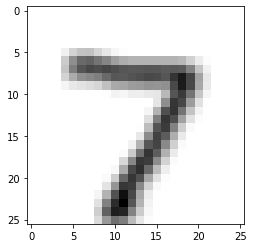

In [16]:
img1 = conv1.forward(test.X[:1])
plot_img(img1,shape=(26,26))


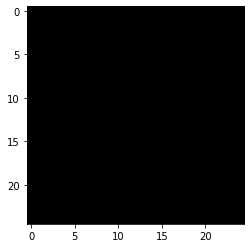

In [17]:
img2= pool1.forward(act1.forward(img1))
plot_img(img2,shape=(25,25))